# Exercise 12

**Exercise 12.1**

By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. <span style="color:red">Watch to accuracy and loss for training and validation data and comment on the performances</span>.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 784)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [3]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    print('Model architecture created successfully!')
    return model

In [4]:
def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                  optimizer=opt(),
                  metrics=['accuracy'])
    print('Model compiled successfully and ready to be trained.')
    return model

In [5]:
%%capture
# training parameters
batch_size = 32
epochs = 5

histories = []
optimizers = [SGD, Adam, Adamax, RMSprop]
# create the deep neural net
for i in optimizers:
    model_DNN = compile_model(i)

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))
    histories.append(history)

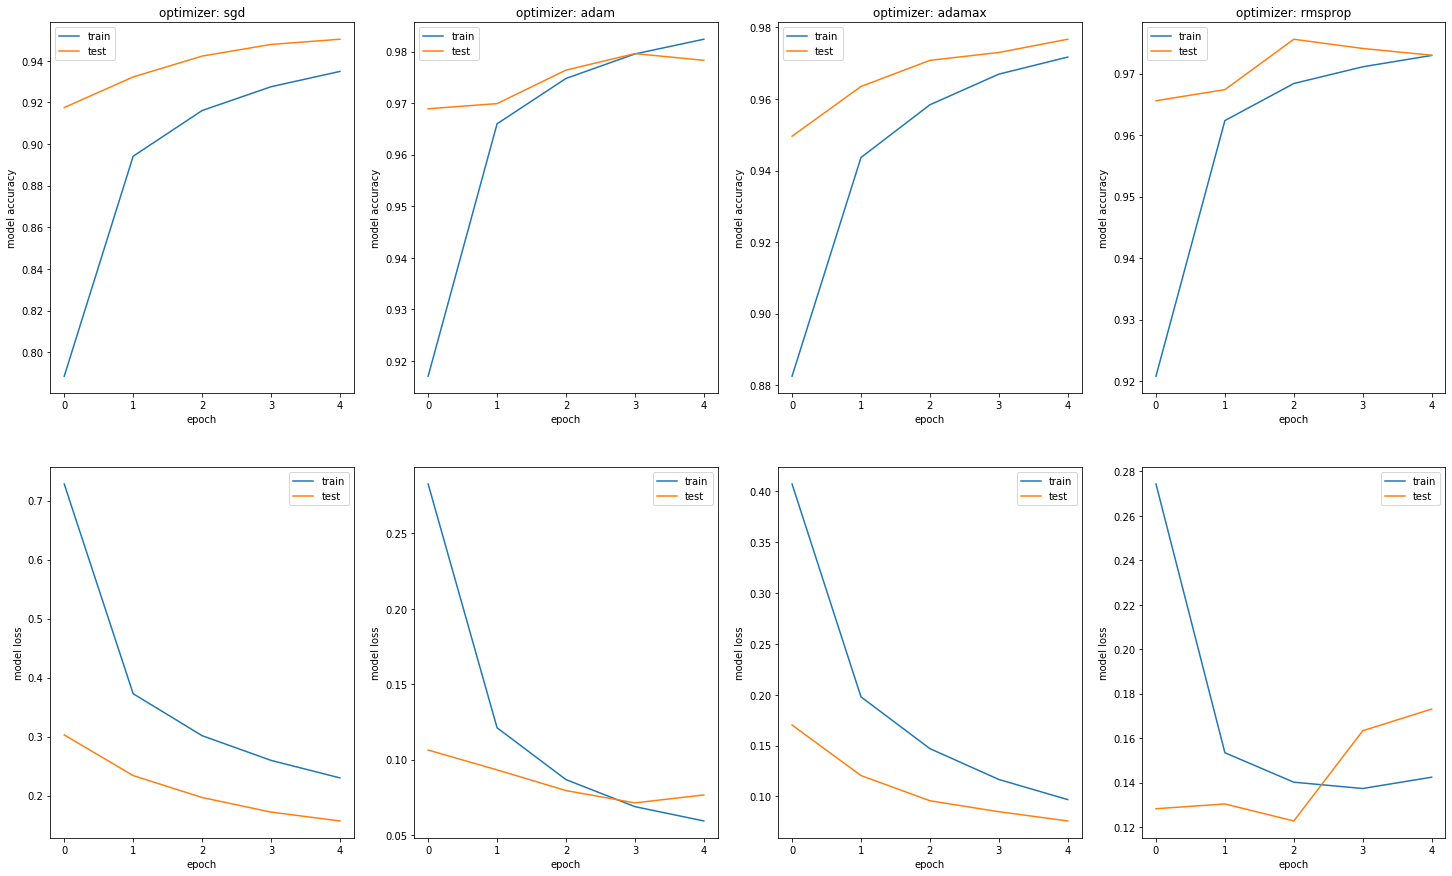

In [8]:
opt = ['sgd', 'adam', 'adamax', 'rmsprop']
fig, ax = plt.subplots(2,4, figsize=(25,15))
for i in range(len(optimizers)):
    # summarize history for accuracy
    ax[0,i].plot(histories[i].history['accuracy'])
    ax[0,i].plot(histories[i].history['val_accuracy'])
    ax[0,i].set_ylabel('model accuracy')
    ax[0,i].set_xlabel('epoch')
    ax[0,i].set_title('optimizer: {}'.format(opt[i]))
    ax[0,i].legend(['train', 'test'], loc='best')
    ax[0,i].set_xticks(np.arange(0,5,1))


    # summarize history for loss
    ax[1,i].plot(histories[i].history['loss'])
    ax[1,i].plot(histories[i].history['val_loss'])
    ax[1,i].set_ylabel('model loss')
    ax[1,i].set_xlabel('epoch')
    ax[1,i].legend(['train', 'test'], loc='best')
    ax[1,i].set_xticks(np.arange(0,5,1))

The best optimizer is Adam which provides an accuracy around 0.98 followed by RMSprop and Adamax, the same conclusion can be obtained by the loss plots.

The fact that the test function is lower than the train function is due to the Dropout layer used in the training process that set to 0 some neurons.

**Exercise 12.2**

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

In [9]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [10]:
def create_CNN(opt):
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     padding='valid',
                     input_shape=input_shape))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(Dropout(0.3))
    assert model.output_shape == (None, 24, 24, 10)
    
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    model.add(tf.keras.layers.LeakyReLU())
    assert model.output_shape == (None, 12, 12, 10)
    
    model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='valid'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(Dropout(0.3))
    assert model.output_shape == (None, 8, 8, 16)
    
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    model.add(tf.keras.layers.LeakyReLU())
    assert model.output_shape == (None, 4, 4, 16)
    
    model.add(Flatten())
    model.add(Dense(256, activation='tanh'))
    model.add(Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                  optimizer=opt(),
                  metrics=['accuracy'])
    return model

In [11]:
%%capture
# training parameters
batch_size = 32
epochs = 5
optimizers = [SGD, Adam, Adamax, RMSprop]
hystories = []

for i in optimizers:
    # create the deep conv net
    model_CNN=create_CNN(i)

    # train CNN
    hystory = model_CNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))

    histories.append(history)

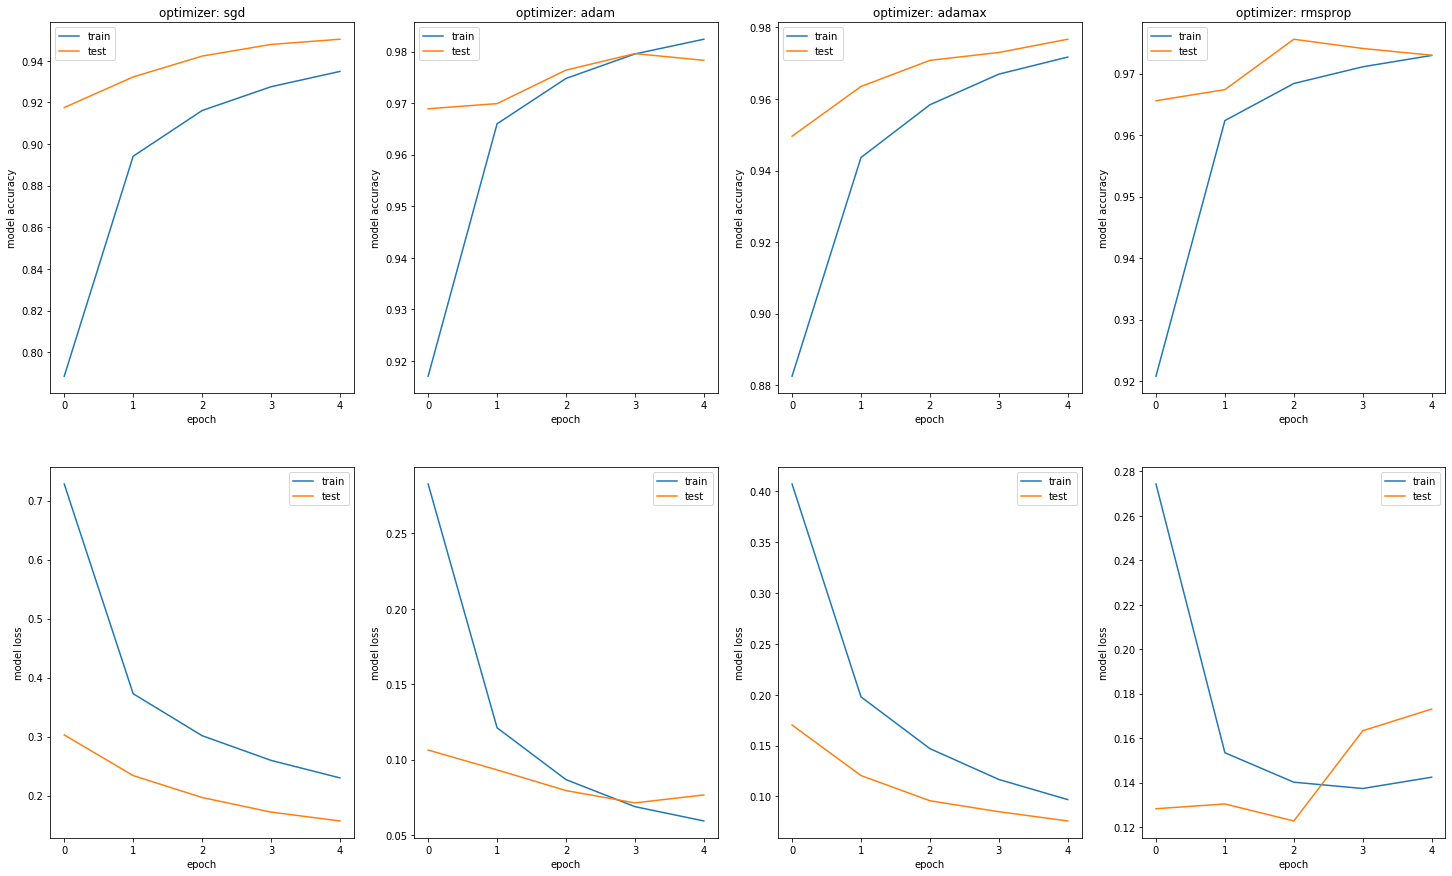

In [12]:
opt = ['sgd', 'adam', 'adamax', 'rmsprop']
fig, ax = plt.subplots(2,4, figsize=(25,15))
for i in range(len(optimizers)):
    # summarize history for accuracy
    ax[0,i].plot(histories[i].history['accuracy'])
    ax[0,i].plot(histories[i].history['val_accuracy'])
    ax[0,i].set_ylabel('model accuracy')
    ax[0,i].set_xlabel('epoch')
    ax[0,i].set_title('optimizer: {}'.format(opt[i]))
    ax[0,i].legend(['train', 'test'], loc='best')
    ax[0,i].set_xticks(np.arange(0,5,1))

    # summarize history for loss
    ax[1,i].plot(histories[i].history['loss'])
    ax[1,i].plot(histories[i].history['val_loss'])
    ax[1,i].set_ylabel('model loss')
    ax[1,i].set_xlabel('epoch')
    ax[1,i].legend(['train', 'test'], loc='best')
    ax[1,i].set_xticks(np.arange(0,5,1))

As in the case of the DNN, the best optimizer is Adam which provides an accuracy around 0.98 followed by RMSprop and Adamax, the same conclusion can be obtained by the loss plots.

The SGD optimizer show lower accuracy around 0.94.

**Exercise 12.3**

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

In [13]:
from PIL import Image
import os

def load_image(filename):
    digit_filename = filename
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size

    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    data = data.reshape(1,28,28,1)
    return data

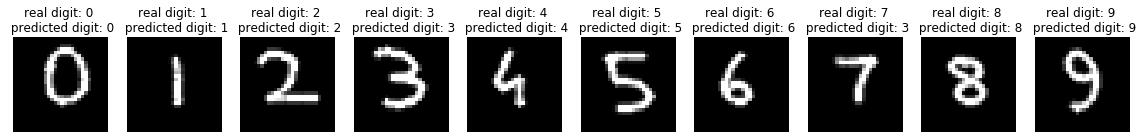

In [16]:
#train best model
numbers = 10
model_CNN=create_CNN(Adam)
model_CNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))

fig, ax = plt.subplots(1, 10, figsize=(20,20))
for i in range(numbers):
    img = load_image(str(i)+'.png')

    ax[i].imshow(img[0,:,:,0], cmap='gray')
    ax[i].set_title('real digit: {} \n predicted digit: {}'.format(i, np.argmax(model_CNN.predict(img))))
    ax[i].axis('off')